In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


Bu blog postta Titanic verisetinin Matplotlib, Pandas ve Seaborn kütüphaneleriyle görselleştirmesi yapılacaktır.
Öncelikle Titanic verisini indirelim.

Bu aşamada Jupyter Notebook ve Python programlama kullanılacaktır.
Haydi başlayalım.

# KÜTÜPHANELERİN YÜKLENMESİ

In [52]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
#%matplotlib qt
# pip install PyQt5
#from IPython.display import Image
%matplotlib inline 

# VERİYE İLK BAKIŞ

* Verisetinin ilk 5 satırına baktığımızda categorical, int ve floattan oluşan 12 değişken vardır. Değişkenlerin tanımları aşağıdaki gibidir.
* PassengerId : Yolcu id
* Survived : Titanic gemisinde hayatta kalanlar 1 , hayatta kalmayanlar 0
* Pclass : 1 : Ekonomi statüsüdür
* 1st = Upper
* 2nd = Middle
* 3rd = Lower
* Name : Yolcuların isimleri
* Sex : Male/Female
* Age : Yolcuların Yaşları
* SlipSp : abi/abla (1 or 0)
* Parch : ebeveyn/çocuk (1 or 0)
* Ticket : Bilet numaraları
* Fare : Bilet fiyatı
* Cabin : Kabin numarası
* Embarked : Liman isimleri (C, Q, S)
* C = Cherbourg, Q = Queenstown, S = Southampton
* read_csv( )
* Csv datasetini pandas kütüphanesi ile okuduk.

In [54]:
#there are 12 variable of titanic dataset
data=pd.read_csv("/kaggle/input/titanic/train.csv", sep=",")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**value_counts( )**


549 kişinin hayatta kalmadığını, 342 kişinin hayatta kaldığını inceledik.

In [20]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
data.Fare.value_counts().head(10)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
26.5500    15
0.0000     15
Name: Fare, dtype: int64

**info()**

Datasetinin Dataframeden oluştuğunu, 891 observation (gözlem) 12 variable(değişken), datasetinin 83.6 KB boyutta olduğunu inceliyoruz.Buna ek olarak değişkenlerde 5 ader int, 5 adet kategorik ve 2 adet float bilgisine ulaşıyoruz.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**dtypes( )**

Her bir değişkenin veri tiplerini görüyoruz.

In [28]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**size( )**

In [34]:
data.size

10692

Bu dataset toplam 10692 adet veriden oluşmaktadır.

**shape( )**

In [32]:
data.shape

(891, 12)

891 gözlem, 12 değişkenden oluşmaktadır.

**describe( ).T** 

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Değişkenlerin satır olarak görülmesini ve istatistiksel bilgilerini (min, max, standart sapma, mean vb.gibi) verir.

**type( )**

datasetin typeının **DataFrame** olduğunu gösterir.

In [39]:
type(data)

pandas.core.frame.DataFrame

**count()**

In [41]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

**MissingValue**

Eksik gözlem değerinin olup olmadığına bakarak True veya False döndürür.

In [44]:
data.isnull().values.any()

True

**Missing Valueların Toplam Sayısı**

In [45]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age değişkeninde toplam 177 missing value vardır.
Cabin değişkeninde toplam 687 missing value vardır.
Embarked değişkeninde toplam 2 missing value vardır.

#  SEABORN İLE VERİ GÖRSELLEŞTİRME

# **BARPLOT**

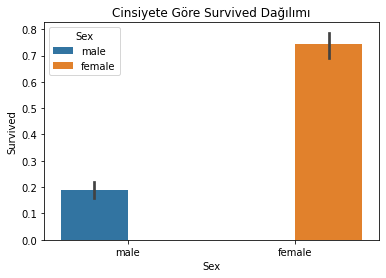

In [63]:
a=sns.barplot(x="Sex", y="Survived", hue="Sex", data=data);
a.set_title("Cinsiyete Göre Survived Dağılımı");

# CATPLOT — ViOLİN

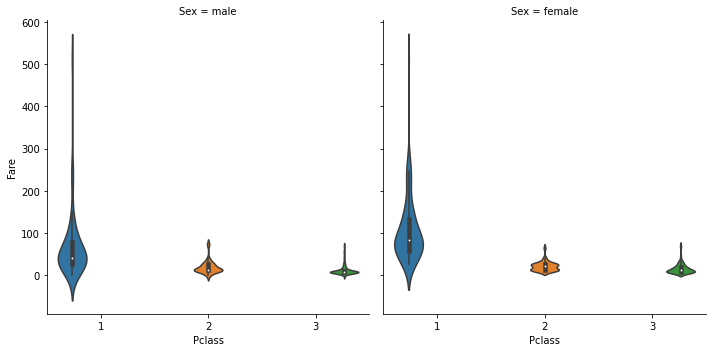

In [65]:
sns.catplot(x="Pclass", y="Fare", kind="violin", hue="Pclass", col="Sex", orient="v", data=data);

# CATPLOT — BAR

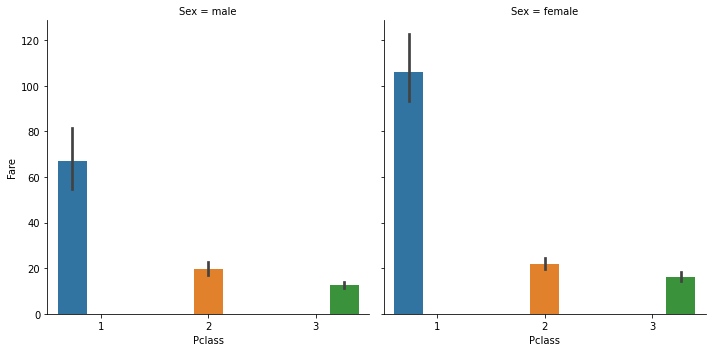

In [66]:
sns.catplot(x="Pclass", y="Fare", kind="bar", hue="Pclass", col="Sex", orient="v", data=data);

# Distplot

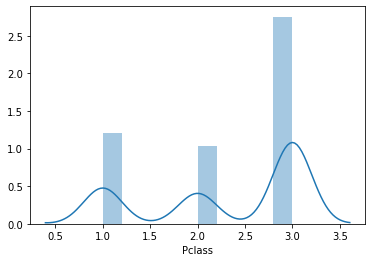

In [70]:
sns.distplot(data.Pclass);

# KDEPLOT

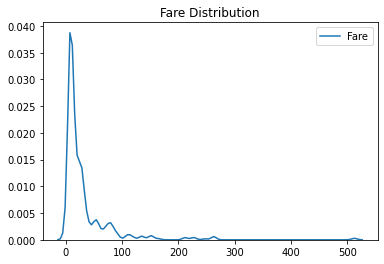

In [75]:
#kdeplot
sns.kdeplot(data["Fare"]).set_title("Fare Distribution");

# Pairplot

Değişkenlerin birbirleriyle korelasyonunu gösteren plot grafiklerini getirir.

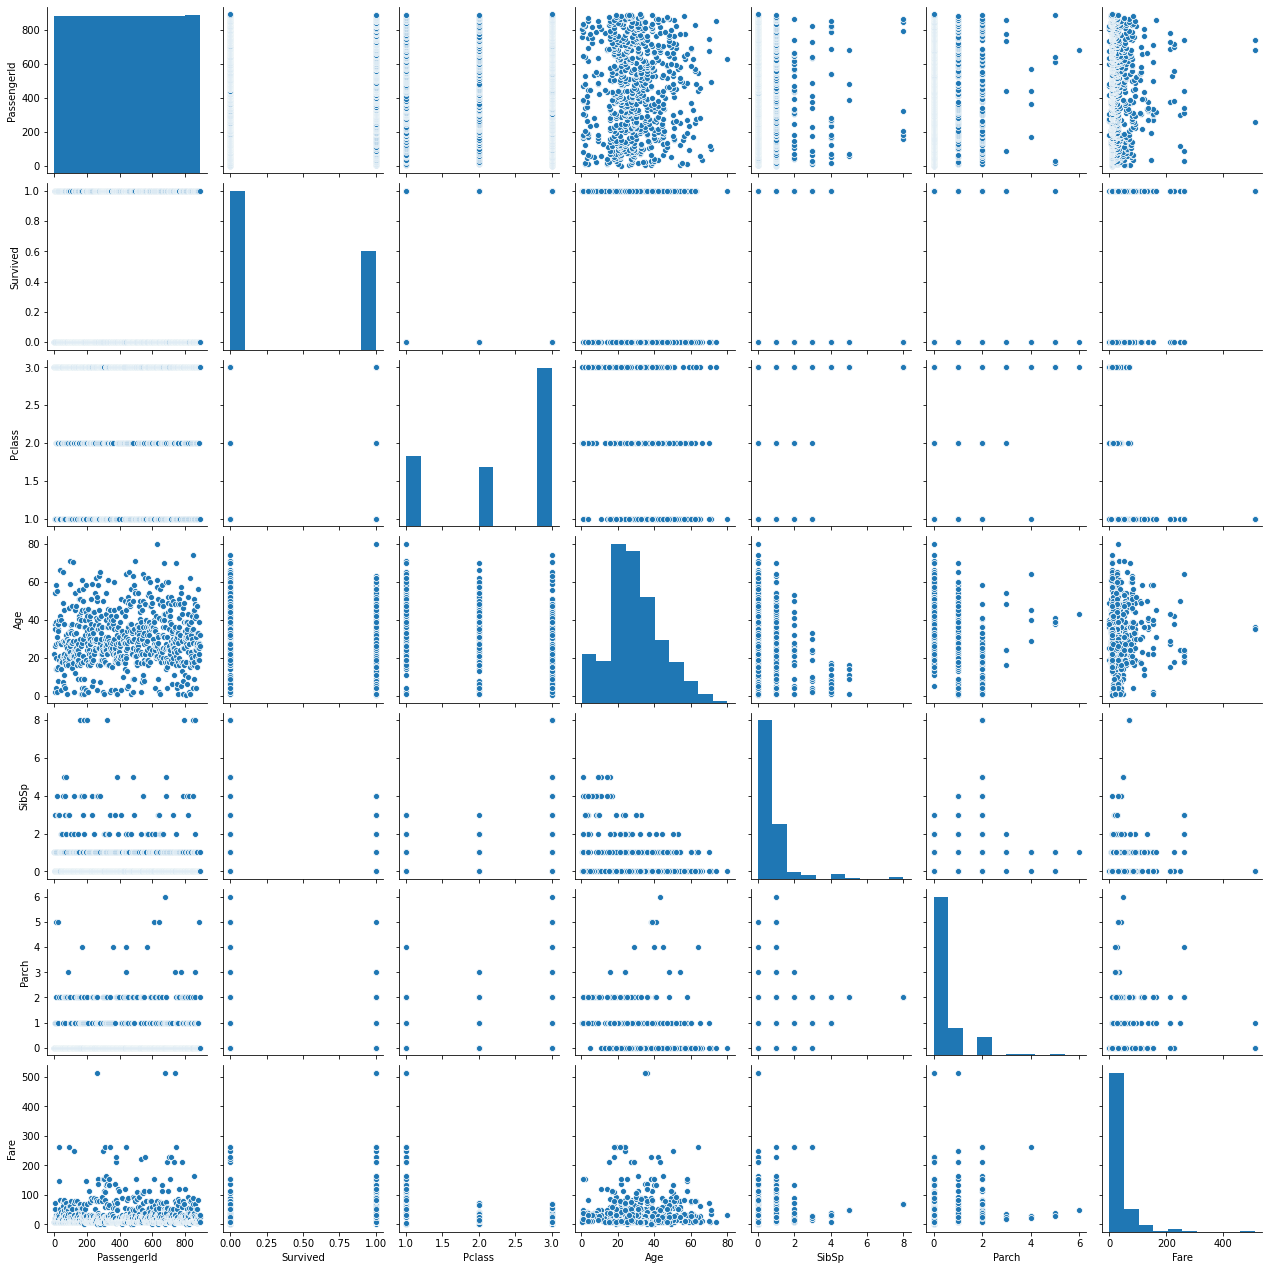

In [79]:
sns.pairplot(data)

# HeatMap

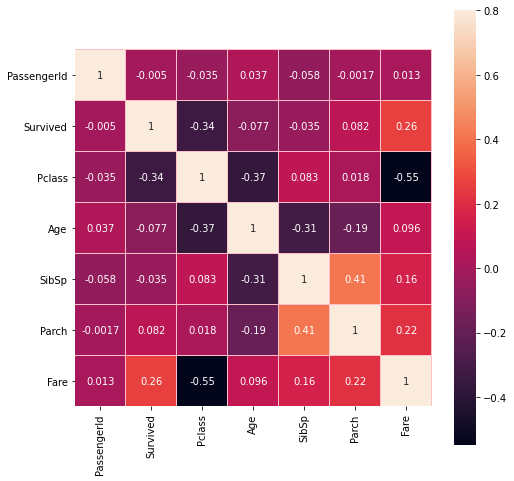

In [83]:
import matplotlib.pyplot as plt
corr=data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, vmax=.8, linewidths=0.05,square=True,annot=True,linecolor="pink");

# MATPLOTLIB KÜTÜPHANESİ İLE VERİ GÖRSELLEŞTİRME

# BARPLOT

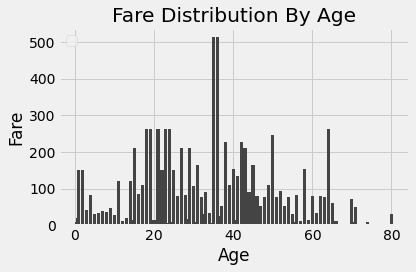

In [84]:
plt.style.use("fivethirtyeight")
plt.bar(data.Age, data.Fare, color="#444444")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Fare Distribution By Age")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# HISTOGRAM

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


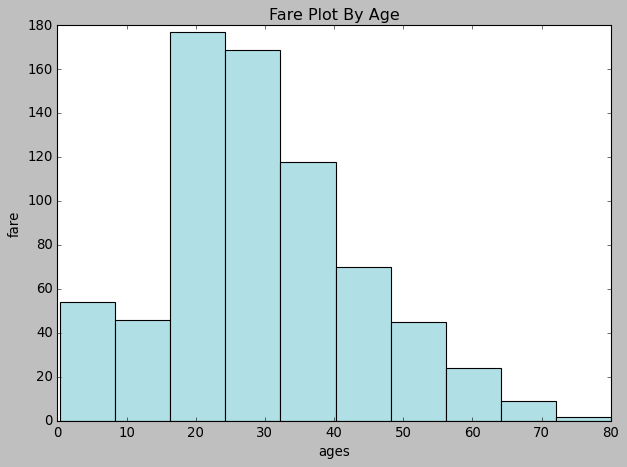

In [86]:
ages=data["Age"]
fare=data["Fare"]
plt.style.use("classic")
plt.hist(ages, color="#B0E0E6")
plt.title("Fare Plot By Age")
plt.xlabel("ages")
plt.ylabel("fare")
plt.tight_layout()
plt.show();

Şimdilik görselleştirme notebooku sona ermiştir. İşinize yaraması dileğiyle..